Import required libraries

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion

Read the data

In [58]:
df_train = pd.read_csv('DataAnalyst.csv', header=0, encoding = 'unicode_escape')
df_train.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Weâre looking for a Senior Data Analyst who ...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [59]:
from io import StringIO

col = ['Easy Apply', 'Job Description']
df_train = df_train[col]
df_train = df_train[pd.notnull(df_train['Job Description'])]
df_train.columns = ['Easy Apply', 'Job Description']

df_train['category_id'] = df_train['Easy Apply'].factorize()[0]

category_id_df_train = df_train[['Easy Apply', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df_train.values)

id_to_category = dict(category_id_df_train[['category_id', 'Easy Apply']].values)


In [60]:
df_train.head()

,Easy Apply,Job Description,category_id
0,True,Are you eager to roll up your sleeves and harn...,0
1,-1,Overview\n\nProvides analytical and technical ...,1
2,-1,Weâre looking for a Senior Data Analyst who ...,1
3,-1,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,1
4,True,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,0


In [61]:
df_train['job_description'] = df_train['Job Description']
df_train['easy_apply'] = df_train['Easy Apply']

In [62]:
df_train.head()

,Easy Apply,Job Description,category_id,job_description,easy_apply
0,True,Are you eager to roll up your sleeves and harn...,0,Are you eager to roll up your sleeves and harn...,True
1,-1,Overview\n\nProvides analytical and technical ...,1,Overview\n\nProvides analytical and technical ...,-1
2,-1,Weâre looking for a Senior Data Analyst who ...,1,Weâre looking for a Senior Data Analyst who ...,-1
3,-1,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,1,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,-1
4,True,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,0,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,True


In [63]:
df_train.drop(["Easy Apply","Job Description"], inplace = True, axis = 1 )
df_train.head()

,category_id,job_description,easy_apply
0,0,Are you eager to roll up your sleeves and harn...,True
1,1,Overview\n\nProvides analytical and technical ...,-1
2,1,Weâre looking for a Senior Data Analyst who ...,-1
3,1,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,-1
4,0,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,True


Shape of the data

In [64]:
df_train.shape

(2253, 3)

Bar chart of class proportion

In [65]:
true_len = df_train[df_train['easy_apply'] == 'True'].shape[0]
false_len = df_train[df_train['easy_apply'] == '-1'].shape[0]

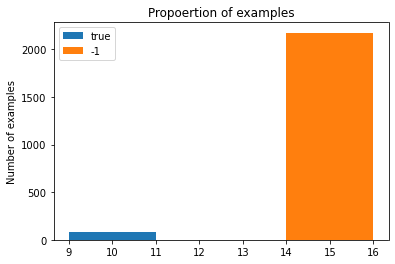

In [67]:
import matplotlib.pyplot as plt

plt.bar(10,true_len,2, label="true")
plt.bar(15,false_len,2, label="-1")

plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

Exploration data Analysis

In [68]:
df_train.describe()

,category_id
count,2253.000000
mean,0.964492
std,0.185102
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [71]:
df_train['length'] = df_train.job_description.apply(len)
df_train.head()

,category_id,job_description,easy_apply,length
0,0,Are you eager to roll up your sleeves and harn...,True,7057
1,1,Overview\n\nProvides analytical and technical ...,-1,4702
2,1,Weâre looking for a Senior Data Analyst who ...,-1,4714
3,1,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,-1,5301
4,0,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,True,3394


Text Pre-processing

In [73]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

Apply the function to each examples

In [75]:
df_train['job_description'] = df_train['job_description'].apply(remove_punctuation)
df_train.head(10)

,category_id,job_description,easy_apply,length
0,0,Are you eager to roll up your sleeves and harn...,True,7057
1,1,Overview\n\nProvides analytical and technical ...,-1,4702
2,1,Weâre looking for a Senior Data Analyst who ...,-1,4714
3,1,Requisition NumberRR0001939\nRemoteYes\nWe col...,-1,5301
4,0,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,True,3394
5,1,About Cubist\nCubist Systematic Strategies is ...,-1,2615
6,1,Two Sigma is a different kind of investment ma...,-1,3149
7,0,Data Science Analyst\n\nJob Details\nLevel\nEx...,True,1639
8,1,The Data Analyst is an integral member of the ...,-1,3342
9,1,About Us\n\nRiskified is the AI platform power...,-1,3468


Removing stopwords

Extract the stop words

In [76]:
import string
import numpy as np
from nltk.corpus import stopwords

# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [77]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


Function to remove stopwords

In [78]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

Apply the function to each examples

In [80]:
df_train['job_description'] = df_train['job_description'].apply(stopwords)
df_train.head(10)

,category_id,job_description,easy_apply,length
0,0,eager roll sleeves harness data drive policy c...,True,7057
1,1,overview provides analytical technical support...,-1,4702
2,1,weâre looking senior data analyst love mento...,-1,4714
3,1,requisition numberrr0001939 remoteyes collabor...,-1,5301
4,0,fanduel group fanduel group worldclass team br...,True,3394
5,1,cubist cubist systematic strategies one worldâ...,-1,2615
6,1,two sigma different kind investment manager si...,-1,3149
7,0,data science analyst job details level experie...,True,1639
8,1,data analyst integral member global commercial...,-1,3342
9,1,us riskified ai platform powering ecommerce re...,-1,3468


Collect vocabulary count

In [85]:
from collections import Counter

words = df_train[df_train.category_id == '0'].job_description.apply(lambda x: [word.lower() 
                                                                                     for word in x.split()])
true_words = Counter()

for text in words:
    true_words.update(text)
    
    
print(true_words.most_common(50))

[]


In [83]:
from collections import Counter

words = df_train[df_train.easy_apply == '-1'].job_description.apply(lambda x: [word.lower() 
                                                                                     for word in x.split()])
true_words = Counter()

for text in words:
    true_words.update(text)
    
    
print(true_words.most_common(50))

[('data', 22407), ('experience', 8969), ('business', 6625), ('work', 5086), ('skills', 4344), ('analysis', 3650), ('management', 3510), ('team', 3442), ('ability', 3317), ('analyst', 3279), ('years', 2851), ('â\x80¢', 2844), ('information', 2637), ('knowledge', 2601), ('support', 2567), ('strong', 2519), ('job', 2519), ('requirements', 2510), ('required', 2372), ('reporting', 2371), ('analytics', 2289), ('sql', 2163), ('quality', 2132), ('including', 2074), ('working', 2074), ('tools', 2060), ('development', 2044), ('systems', 2042), ('reports', 2041), ('new', 1890), ('technical', 1877), ('solutions', 1829), ('provide', 1720), ('degree', 1718), ('related', 1702), ('preferred', 1667), ('position', 1610), ('using', 1591), ('develop', 1571), ('analytical', 1477), ('must', 1477), ('processes', 1451), ('process', 1438), ('project', 1434), ('health', 1408), ('role', 1405), ('environment', 1393), ('technology', 1393), ('company', 1386), ('design', 1361)]


Vectorization

In [107]:
X = df_train['job_description']
y = df_train['category_id']

create a CountVectorizer object

In [108]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()

Use the fit_transform method

In [109]:
X=cv.fit_transform(X)

Split into train and test sets

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1689, 26352)
(564, 26352)
(1689,)
(564,)


Training a Model

Import MultinomialNB

In [111]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

Now fit nb

In [112]:
nb.fit(X_train,y_train)

MultinomialNB()

Predictions and Evaluations

In [113]:
prediction=nb.predict(X_test)

Create a confusion matrix and classification report

In [114]:
from sklearn.metrics import confusion_matrix,classification_report

In [115]:
print(confusion_matrix(y_test,prediction))

[[  0  17]
 [  1 546]]


In [116]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.97      1.00      0.98       547

    accuracy                           0.97       564
   macro avg       0.48      0.50      0.49       564
weighted avg       0.94      0.97      0.95       564



Import TfidfTransformer from sklearn

In [117]:
from sklearn.feature_extraction.text import TfidfTransformer

Import Pipeline from sklearn. 

In [118]:
from sklearn.pipeline import Pipeline

Create a pipeline with CountVectorizer(), TfidfVectorizer() and MultinomialNB()

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [120]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ( 'tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [121]:
X = df_train['job_description']
y = df_train['category_id']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [123]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Prediction and Evaluation 

In [124]:
prediction = pipeline.predict(X_test)

In [125]:
print(confusion_matrix(y_test, prediction), classification_report(y_test, prediction))

[[  0  21]
 [  0 655]]               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.97      1.00      0.98       655

    accuracy                           0.97       676
   macro avg       0.48      0.50      0.49       676
weighted avg       0.94      0.97      0.95       676



/home/chi/anaconda3/envs/nltkENv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
